# **Project Name**    - Email Campaign Effectiveness Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual



# **Project Summary -**



First of all we have a data related to Email Campaign. Our business objective is to create a Machine Learning Model that will predict an email can be ignored, read or acknowledged by the customer. For this project at first we had to import some python libraries. We imported pandas and numpy for data manipulation, matplotlib and seaborn from visualization and so many sklearn sub-libraries for model building. After that we imported out dataset. By the help of this past data we had created our model. Then we cleand our data. Then we took some insight from this data like by the help of visualization. Then we used dist plot, bar plot, heatmap plot, scatter plot etc for the visualization. After that we had started our model building. Then we had to work on our data because model can not read text data. For this we changed our categorical values to numrical. Our data set was not balanced so we used over sampeling method for balancing it. After that we got our final data which is maching readable format. Then We create 3 models which are Logistic Regression, Decition Tree and XGBoost respectively.

# **GitHub Link -**

Provide your GitHub Link here.


# **Problem Statement**



 **The main objective of this project is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
data=pd.read_csv('/content/drive/MyDrive/AlmabetterProjects/Machine learning/Capstone project/data_email_campaign.csv')

### Dataset First View

In [ ]:
# Dataset First Look
data

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(68353, 12)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
Email_ID,0
Email_Type,0
Subject_Hotness_Score,0
Email_Source_Type,0
Customer_Location,11595
Email_Campaign_Type,0
Total_Past_Communications,6825
Time_Email_sent_Category,0
Word_Count,0
Total_Links,2201


Text(0.5, 1.0, 'Visualizing the missing values')

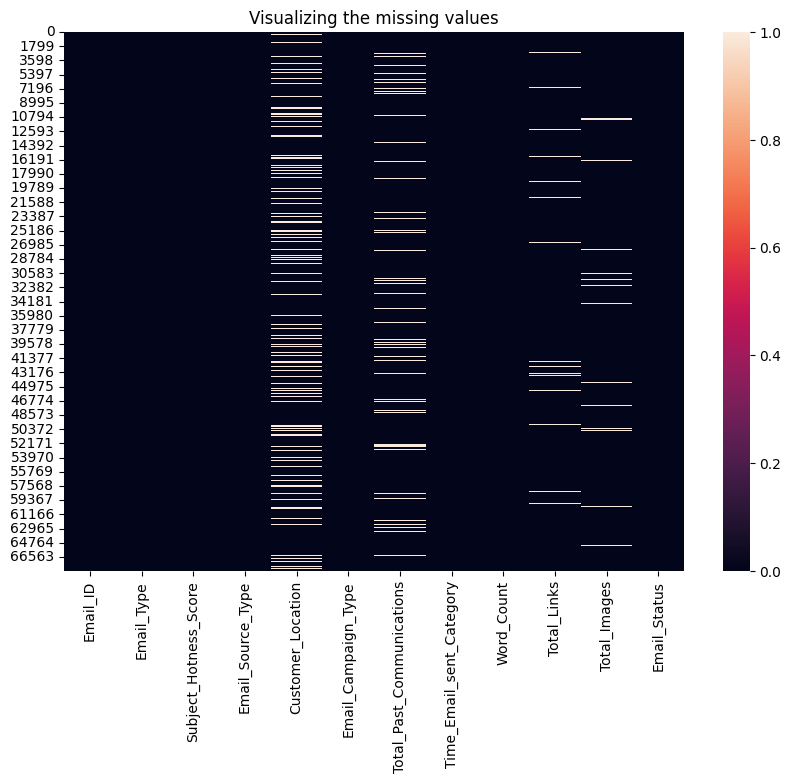

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull())
plt.title('Visualizing the missing values')

### What did you know about your dataset?

Answer Here

From our first analysis we have known

1. There are 68353 rows and 12 columns in the dataset.
2. Datatypes of the features data types.
3. Dataset don't have duplicate rows.
4. Customer_Location column has 11595,Total_Past_Communications has 6825,Total_Links has 2201 and Total_Images has 1677 null values.
5. Customer_Location column has most nall values


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe().T # T is used for table view

,count,mean,std,min,25%,50%,75%,max
Email_Type,68353.0,1.285094,0.451462,1.0,1.0,1.0,2.0,2.0
Subject_Hotness_Score,68353.0,1.095481,0.997578,0.0,0.2,0.8,1.8,5.0
Email_Source_Type,68353.0,1.456513,0.498109,1.0,1.0,1.0,2.0,2.0
Email_Campaign_Type,68353.0,2.272234,0.468680,1.0,2.0,2.0,3.0,3.0
Total_Past_Communications,61528.0,28.933250,12.536518,0.0,20.0,28.0,38.0,67.0
Time_Email_sent_Category,68353.0,1.999298,0.631103,1.0,2.0,2.0,2.0,3.0
Word_Count,68353.0,699.931751,271.719440,40.0,521.0,694.0,880.0,1316.0
Total_Links,66152.0,10.429526,6.383270,1.0,6.0,9.0,14.0,49.0
Total_Images,66676.0,3.550678,5.596983,0.0,0.0,0.0,5.0,45.0
Email_Status,68353.0,0.230934,0.497032,0.0,0.0,0.0,0.0,2.0


### Variables Description

Answer Here

**Email ID** : Email id of the customer

**Email type** : There are two categories 1 and 2. We can think of them as marketing emails or important updates, notices like emails regarding the business

**Subject Hotness Score** : It is the email's subject's score on the basis of how good and effective the content is.

**Email Source** : It represents the source of the email like sales and marketing or important admin mails related to the product

**Email Campaign Type** : The campaign type of the email.

**Total Past Communications** : This column contains the total previous mails from the same source, the number of communications had.

**Customer Location** : Contains demographical data of the customer, the location where the customer resides

**Time Email sent Category** : It has three categories 1,2 and 3; the time of the day when the email was sent, we can think of it as morning, evening and night time slots.

**Word Count** : The number of words contained in the email

**Total links** : Number of links in the email.

**Total Images** : Number of images in the email.

**Email Status** : Our target variable which contains whether the mail was ignored, read, acknowledged by the reader

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
data.apply(lambda x: x.unique())

,0
Email_ID,"[EMA00081000034500, EMA00081000045360, EMA0008..."
Email_Type,"[1, 2]"
Subject_Hotness_Score,"[2.2, 2.1, 0.1, 3.0, 0.0, 1.5, 3.2, 0.7, 2.0, ..."
Email_Source_Type,"[2, 1]"
Customer_Location,"[E, nan, B, C, G, D, F, A]"
Email_Campaign_Type,"[2, 3, 1]"
Total_Past_Communications,"[33.0, 15.0, 36.0, 25.0, 18.0, nan, 34.0, 21.0..."
Time_Email_sent_Category,"[1, 2, 3]"
Word_Count,"[440, 504, 962, 610, 947, 416, 116, 1241, 655,..."
Total_Links,"[8.0, 5.0, 16.0, 4.0, 11.0, 6.0, 21.0, nan, 31..."


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# make copy of our real data in df variable
df=data.copy()

In [ ]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [ ]:
# column name list
for col in df.columns:
  print(col)

Email_ID
Email_Type
Subject_Hotness_Score
Email_Source_Type
Customer_Location
Email_Campaign_Type
Total_Past_Communications
Time_Email_sent_Category
Word_Count
Total_Links
Total_Images
Email_Status


In [ ]:
# unique values for every feature
data.apply(lambda x: x.unique())

,0
Email_ID,"[EMA00081000034500, EMA00081000045360, EMA0008..."
Email_Type,"[1, 2]"
Subject_Hotness_Score,"[2.2, 2.1, 0.1, 3.0, 0.0, 1.5, 3.2, 0.7, 2.0, ..."
Email_Source_Type,"[2, 1]"
Customer_Location,"[E, nan, B, C, G, D, F, A]"
Email_Campaign_Type,"[2, 3, 1]"
Total_Past_Communications,"[33.0, 15.0, 36.0, 25.0, 18.0, nan, 34.0, 21.0..."
Time_Email_sent_Category,"[1, 2, 3]"
Word_Count,"[440, 504, 962, 610, 947, 416, 116, 1241, 655,..."
Total_Links,"[8.0, 5.0, 16.0, 4.0, 11.0, 6.0, 21.0, nan, 31..."


In [ ]:
# convert columns datatype float to integer and fill null values with 0
for col in ['Total_Past_Communications','Total_Links','Total_Images']:
  df[col] = df[col].fillna(0).astype(int,errors='ignore')

In [ ]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  68353 non-null  int64  
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                68353 non-null  int64  
 10  Total_Images               68353 non-null  int64  
 11  Email_Status               68353 non-null  int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 6.3+ MB


In [ ]:
# checking our Email_Status column's value in percentage(%)
df['Email_Status'].value_counts()/df.shape[0]*100

,count
Email_Status,
0,80.378330
1,16.149986
2,3.471684


In [ ]:
# our output column has no null values
df['Email_Status'].isnull().sum()

0

In [ ]:
# check for null values for every columns
df.isnull().sum()

,0
Email_ID,0
Email_Type,0
Subject_Hotness_Score,0
Email_Source_Type,0
Customer_Location,11595
Email_Campaign_Type,0
Total_Past_Communications,0
Time_Email_sent_Category,0
Word_Count,0
Total_Links,0


### What all manipulations have you done and insights you found?

Answer Here.

Here We have did
1. We copy our real data in a new variable.
2. We have seen each column name.
3. Then we have seen unique values for each feature.
4. We have known that some columns are categorical.
5. We changed datatype of 'Total_Past_Communications','Total_Links','Total_Images' columns float to integer and fill null values with '0'.
6. Then we saw that 'Email_Status' column have 3 types of output 0,1,2.
0 means ignored by the reader, 1 means read by the reader, 2 means acknowledged by the reader.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

([<matplotlib.patches.Wedge at 0x798aec9fbe50>,
 [Text(-0.9791350264236446, 0.6937539910013988, 'ignored by the reader'),
  Text(0.8978020017290247, -0.7962107545690126, 'read by the reader'),
  Text(1.5904930796419734, -0.17416016654502736, 'acknowledged by the reader')],
 [Text(-0.571162098747126, 0.4046898280841492, '80.4%'),
  Text(0.523717834341931, -0.46445627349859064, '16.1%'),
  Text(1.0934639922538565, -0.11973511449970632, '3.5%')])

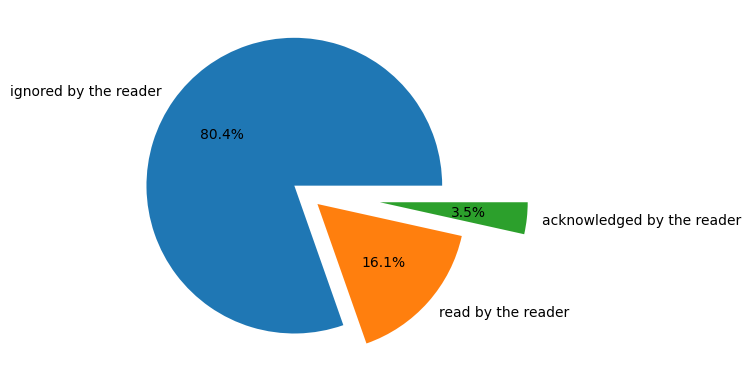

In [ ]:
# Chart - 1 visualization code
fig, ax = plt.subplots()
ax.pie(df['Email_Status'].value_counts(), labels=['ignored by the reader','read by the reader','acknowledged by the reader']
       , autopct='%1.1f%%',explode=(0.1, 0.1, 0.5),shadow=False)

##### 1. Why did you pick the specific chart?

* Pie charts visually represent proportions of a whole, aiding in easy comparison, but are best used with a limited number of distinct categories for clarity and effectiveness.

##### 2. What is/are the insight(s) found from the chart?

* We Data is imbalanced.80.4% emails are ignored by the reader,16.1% are read by the reader and only 3.5% emails are acknowledged by the reader.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The insight that 80.4% of emails are ignored suggests a need for targeted strategies to improve engagement, potentially leading to positive business impact by increasing reader interaction. However, the low acknowledgment rate of 3.5% indicates a challenge in fostering meaningful connections, possibly hindering relationship-building efforts and resulting in negative growth.

#### Chart - 2

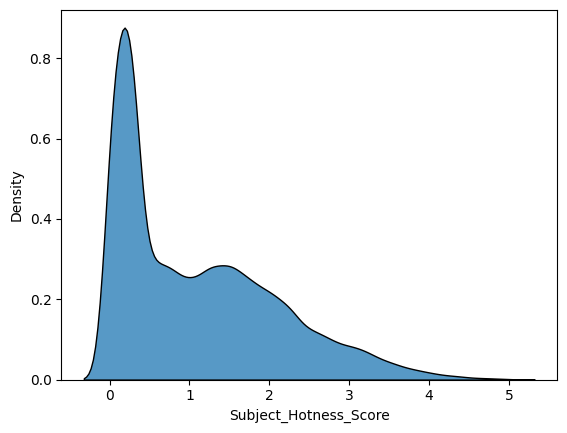

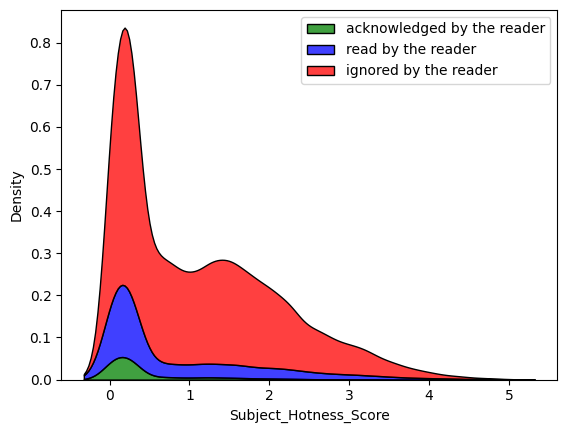

In [ ]:
# Chart - 2 visualization code
sns.kdeplot(data=df, x='Subject_Hotness_Score',multiple="stack")
plt.show()
sns.kdeplot(data=df, x='Subject_Hotness_Score', hue='Email_Status',multiple="stack",palette=['r','b','g'])
plt.legend(['acknowledged by the reader','read by the reader','ignored by the reader'])
plt.show()

##### 1. Why did you pick the specific chart?

* Kdeplot visually displays the distribution of data, providing insights into its shape and density, aiding in understanding patterns and making comparisons.

##### 2. What is/are the insight(s) found from the chart?

* Where Subject Hotness Score is less around 0, density  of acknowledged by the reader,read by the reader,ignored by the reader every thing is high. Where Subject Hotness Score is high density of everything is very low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Insights suggest that emails with lower Subject Hotness Scores tend to receive higher reader engagement, indicating potential opportunities for improving email content relevance and increasing positive business impact. However, the observation of lower engagement density with higher Subject Hotness Scores may signal a need to reevaluate the effectiveness of email prioritization strategies, potentially leading to negative growth if important messages are overlooked.

#### Chart - 3

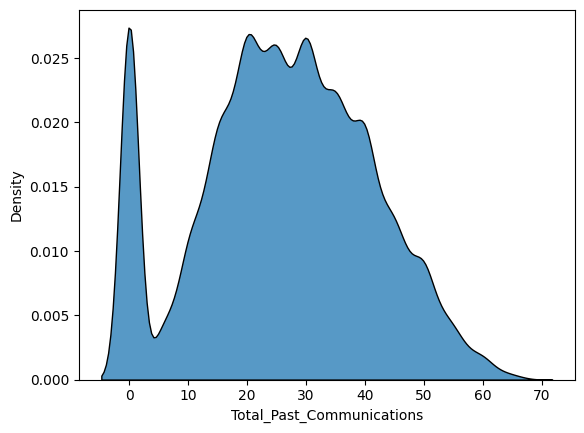

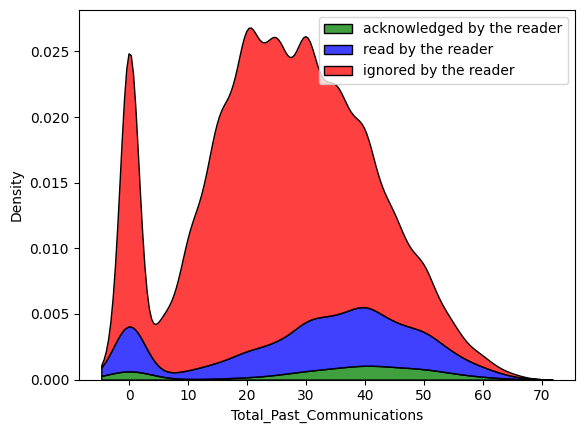

In [ ]:
# Chart - 3 visualization code
sns.kdeplot(data=df, x='Total_Past_Communications',multiple="stack")
plt.show()
sns.kdeplot(data=df, x='Total_Past_Communications', hue='Email_Status',multiple="stack",palette=['r','b','g'])
plt.legend(['acknowledged by the reader','read by the reader','ignored by the reader'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.


* Kdeplot visually displays the distribution of data, providing insights into its shape and density, aiding in understanding patterns and making comparisons.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

* Here we can see the  distribution of Total Past Communications.Where Total Past Communications is 20-50 where ignored by the reader is very high and some where Total Past Communications 40 there acknowledged by the reader is high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

* Insights suggest that recipients with higher total past communications tend to ignore emails more frequently, highlighting a need for targeted engagement strategies to improve reader response rates and potentially create a positive business impact. However, the observation that acknowledgments are high for recipients with around 40 past communications may indicate saturation or fatigue, potentially leading to negative growth if overemphasized without diversifying communication approaches.

#### Chart - 4

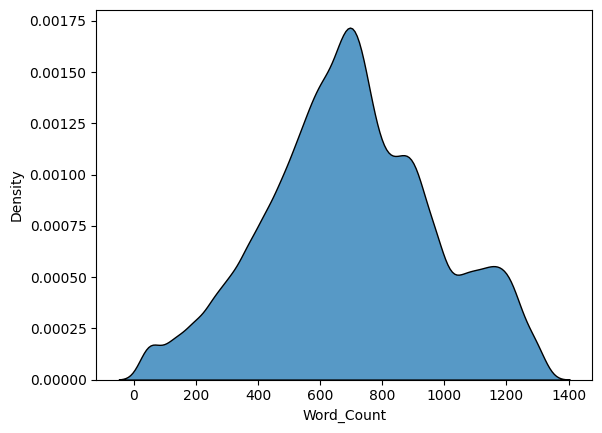

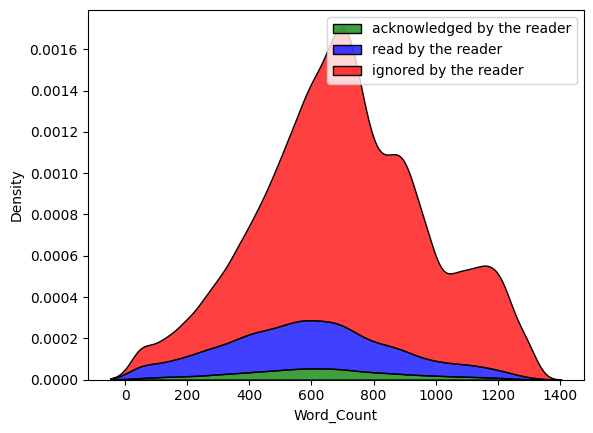

In [ ]:
# Chart - 4 visualization code
sns.kdeplot(data=df, x='Word_Count',multiple="stack")
plt.show()
sns.kdeplot(data=df, x='Word_Count', hue='Email_Status',multiple="stack",palette=['r','b','g'])
plt.legend(['acknowledged by the reader','read by the reader','ignored by the reader'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.


* Kdeplot visually displays the distribution of data, providing insights into its shape and density, aiding in understanding patterns and making comparisons.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
* We got to know from the chart that most of the emails have around 600 words
and most acknowledged by the reader emails have 600 words too.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

* Insights suggest that emails with approximately 600 words are more likely to be acknowledged by readers, indicating an optimal length for communication that may positively impact engagement and response rates. However, reliance solely on this word count without considering content quality or relevance could lead to negative growth if it overlooks the importance of crafting compelling messages tailored to audience preferences.

#### Chart - 5

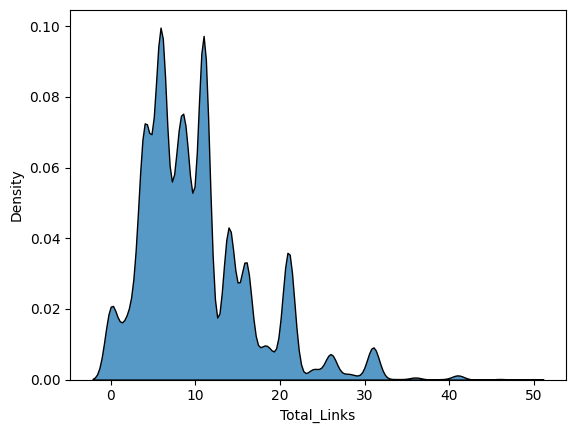

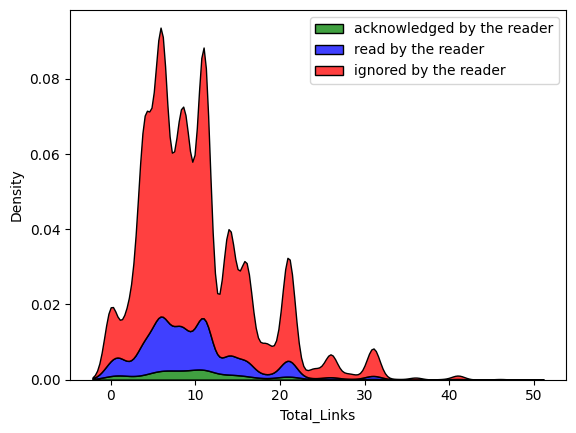

In [ ]:
# Chart - 5 visualization code
sns.kdeplot(data=df, x='Total_Links',multiple="stack")
plt.show()
sns.kdeplot(data=df, x='Total_Links', hue='Email_Status',multiple="stack",palette=['r','b','g'])
plt.legend(['acknowledged by the reader','read by the reader','ignored by the reader'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

* Kdeplot visually displays the distribution of data, providing insights into its shape and density, aiding in understanding patterns and making comparisons.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
* We got to know that where links are less where email open rate is less but where emails have around 5 to 10 where acknowledged by the reader is most.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

* Insights indicate that emails containing a moderate number of links (around 5 to 10) are more likely to be acknowledged by readers, suggesting an optimal balance between providing valuable content and avoiding overwhelming recipients. However, focusing solely on link quantity without considering link quality or relevance could potentially lead to negative growth if it results in spam-like behavior or disengagement from recipients.

#### Chart - 6

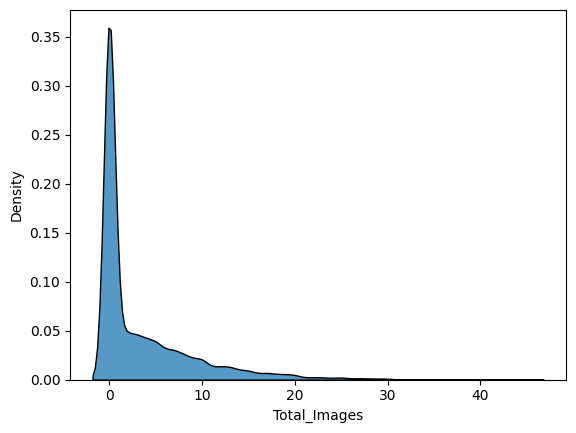

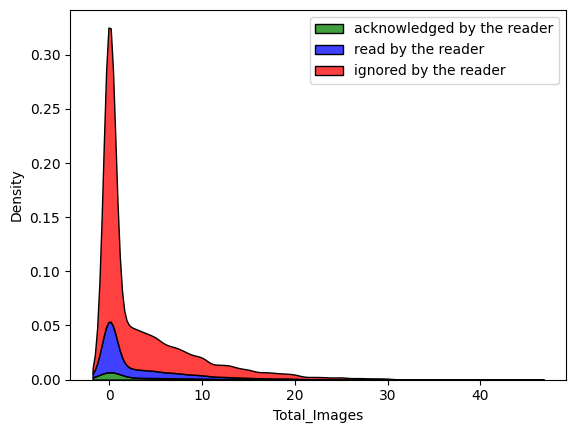

In [ ]:
# Chart - 6 visualization code
sns.kdeplot(data=df, x='Total_Images',multiple="stack")
plt.show()
sns.kdeplot(data=df, x='Total_Images', hue='Email_Status',multiple="stack",palette=['r','b','g'])
plt.legend(['acknowledged by the reader','read by the reader','ignored by the reader'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.


* Kdeplot visually displays the distribution of data, providing insights into its shape and density, aiding in understanding patterns and making comparisons.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
* Most of the emails don't have any images.
Very less email have few images
but acknowledged by the reader emails don't have any imeges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

* Insights suggest that emails without images are more likely to be acknowledged by readers, highlighting the importance of prioritizing content clarity and relevance over visual elements for improved engagement and positive business impact. However, overlooking the potential impact of well-designed and strategically placed images in enhancing communication effectiveness could lead to negative growth if it neglects opportunities to capture audience attention and convey information more effectively.

#### Chart - 7

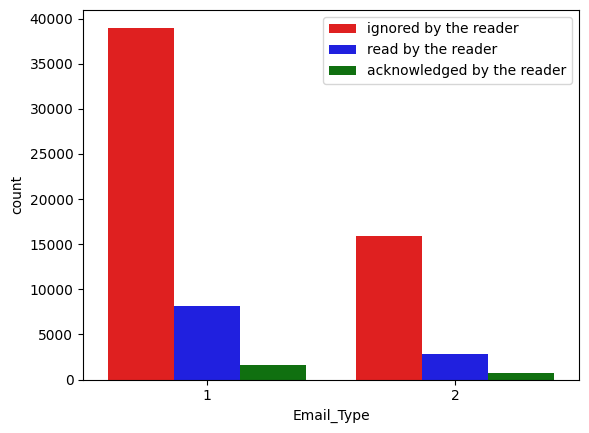

In [ ]:
# Chart - 7 visualization code
sns.countplot(df, x='Email_Type', hue='Email_Status',palette=['r','b','g'])
plt.legend(['ignored by the reader','read by the reader','acknowledged by the reader'])
plt.show()

In [ ]:
df.groupby(['Email_Type','Email_Status'])['Email_ID'].count().reset_index().rename(columns={"Email_ID": "count"})

,Email_Type,Email_Status,count
0,1,0,39004
1,1,1,8208
2,1,2,1654
3,2,0,15937
4,2,1,2831
5,2,2,719


##### 1. Why did you pick the specific chart?

Answer Here

* Countplot succinctly visualizes the frequency of categorical data, facilitating quick comparisons and identifying dominant categories in a dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
* It is clear from the above chart that Type 1 email is mostly ignore by the reader

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

* Insights indicate that Type 1 emails are predominantly ignored by readers, suggesting a need to reassess the content or delivery strategy for this email type to improve engagement and potentially create positive business impact. However, solely focusing on Type 1 emails' performance without considering other factors such as audience segmentation or content relevance may lead to negative growth if it overlooks opportunities to tailor communication approaches to different recipient preferences.

#### Chart - 8

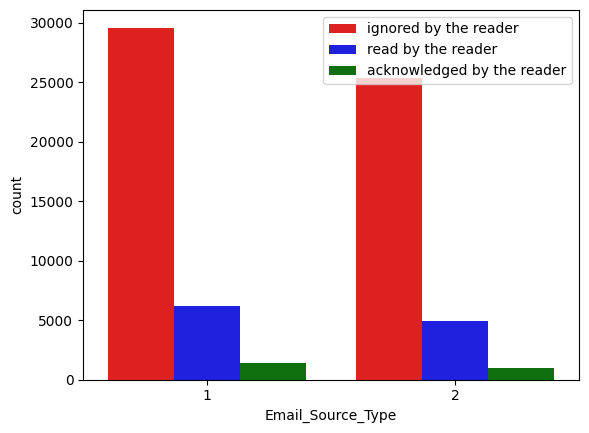

In [ ]:
# Chart - 8 visualization code
sns.countplot(df, x='Email_Source_Type', hue='Email_Status',palette=['r','b','g'])
plt.legend(['ignored by the reader','read by the reader','acknowledged by the reader'])
plt.show()

In [ ]:
df.groupby(['Email_Source_Type','Email_Status'])['Email_ID'].count().reset_index().rename(columns={"Email_ID": "count"})

,Email_Source_Type,Email_Status,count
0,1,0,29577
1,1,1,6150
2,1,2,1422
3,2,0,25364
4,2,1,4889
5,2,2,951


##### 1. Why did you pick the specific chart?

Answer Here.

* Countplot succinctly visualizes the frequency of categorical data, facilitating quick comparisons and identifying dominant categories in a dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

* From the chart we got to know that Email Source Type 1 little high ignored by reader then Email Source Type 2

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

* Insights suggest that emails from Source Type 1 are slightly more likely to be ignored by readers compared to those from Source Type 2, indicating a potential opportunity to refine targeting or messaging strategies for Type 1 sources to enhance reader engagement and potentially create positive business impact. However, solely focusing on this comparison without considering other factors such as content quality or audience preferences may lead to negative growth if it overlooks the nuanced differences between email sources and their respective audiences.

#### Chart - 9

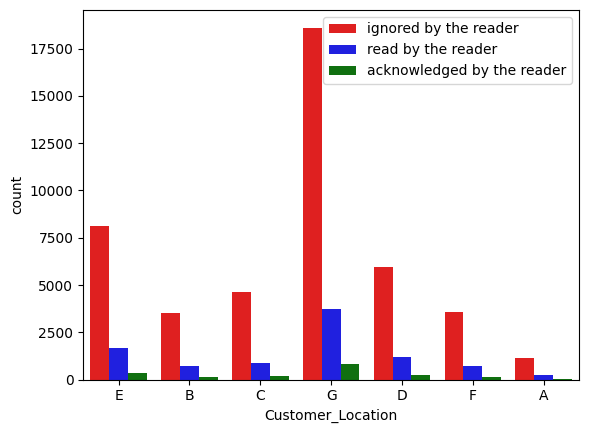

In [ ]:
# Chart - 9 visualization code
sns.countplot(df, x='Customer_Location', hue='Email_Status',palette=['r','b','g'])
plt.legend(['ignored by the reader','read by the reader','acknowledged by the reader'])
plt.show()

In [ ]:
df.groupby(['Customer_Location','Email_Status'])['Email_ID'].count().reset_index().rename(columns={"Email_ID": "count"})

,Customer_Location,Email_Status,count
0,A,0,1160
1,A,1,245
2,A,2,49
3,B,0,3502
4,B,1,714
5,B,2,125
6,C,0,4654
7,C,1,890
8,C,2,214
9,D,0,5950


##### 1. Why did you pick the specific chart?

Answer Here.


* Countplot succinctly visualizes the frequency of categorical data, facilitating quick comparisons and identifying dominant categories in a dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

* From the chart we got to know Customer Location "G" has most ignored emails and Customer Location "A" has very less acknowledged email only 49.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

* Insights reveal that customers from Location "G" receive the highest number of ignored emails, suggesting a need to tailor communication strategies to better resonate with this demographic to potentially improve engagement and create positive business impact. However, the observation of Location "A" receiving very few acknowledged emails may indicate a gap in targeting or relevance, potentially leading to negative growth if not addressed through personalized approaches to enhance customer interaction and satisfaction.

#### Chart - 10

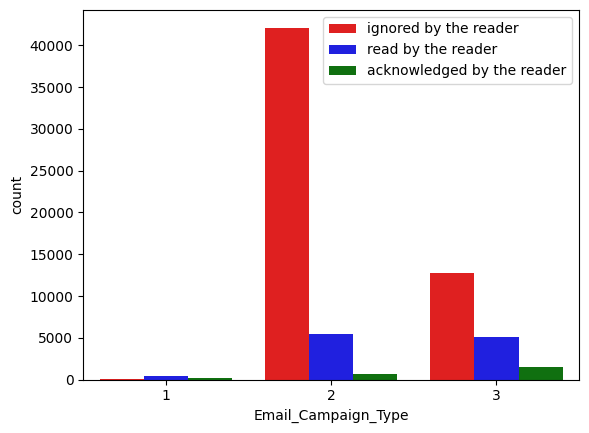

In [ ]:
# Chart - 10 visualization code
sns.countplot(df, x='Email_Campaign_Type', hue='Email_Status',palette=['r','b','g'])
plt.legend(['ignored by the reader','read by the reader','acknowledged by the reader'])
plt.show()

In [ ]:
df.groupby(['Email_Campaign_Type','Email_Status'])['Email_ID'].count().reset_index().rename(columns={"Email_ID": "count"}).rename(columns={"Email_ID": "count"})

,Email_Campaign_Type,Email_Status,count
0,1,0,77
1,1,1,486
2,1,2,173
3,2,0,42115
4,2,1,5446
5,2,2,712
6,3,0,12749
7,3,1,5107
8,3,2,1488


##### 1. Why did you pick the specific chart?

Answer Here.

* Countplot succinctly visualizes the frequency of categorical data, facilitating quick comparisons and identifying dominant categories in a dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

* This chart has shown that Email Campaign Type 1 is no effective.

Email Campaign Type 2 Failed because there are so many ignored emails are there.

and Email Campaign Type 3 is most effective because here ignored, read and acknowledged ratio is 12749, 5107 and 1488.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

* Insights suggest that Email Campaign Type 3 is the most effective, with a balanced distribution of ignored, read, and acknowledged emails, potentially leading to positive business impact through improved engagement and response rates. However, dismissing Email Campaign Type 1 and Type 2 as ineffective without further analysis may lead to missed opportunities for optimization, potentially resulting in negative growth if not addressed to understand underlying factors contributing to their performance.

#### Chart - 11

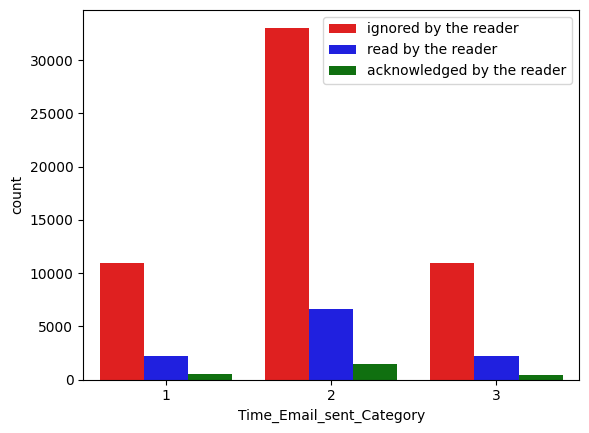

In [ ]:
# Chart - 11 visualization code
sns.countplot(df, x= 'Time_Email_sent_Category', hue='Email_Status',palette=['r','b','g'])
plt.legend(['ignored by the reader','read by the reader','acknowledged by the reader'])
plt.show()

In [ ]:
df.groupby(['Time_Email_sent_Category','Email_Status'])['Email_ID'].count().reset_index().rename(columns={"Email_ID": "count"})

,Time_Email_sent_Category,Email_Status,count
0,1,0,10970
1,1,1,2186
2,1,2,480
3,2,0,33062
4,2,1,6631
5,2,2,1436
6,3,0,10909
7,3,1,2222
8,3,2,457


##### 1. Why did you pick the specific chart?

Answer Here.

* Countplot succinctly visualizes the frequency of categorical data, facilitating quick comparisons and identifying dominant categories in a dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

* from this chart most of the emails send in  evening time and here ration of ignored emails are high on the other hand morning and nigh time emails are more effective

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

* Insights suggest that emails sent in the evening have a higher ratio of being ignored, indicating a potential opportunity to adjust sending times for improved engagement and positive business impact. However, solely focusing on morning and night-time emails as more effective may overlook the unique preferences or behaviors of certain audience segments, potentially leading to negative growth if it neglects to account for individualized communication strategies tailored to different recipient demographics or time zones.

#### Chart - 12

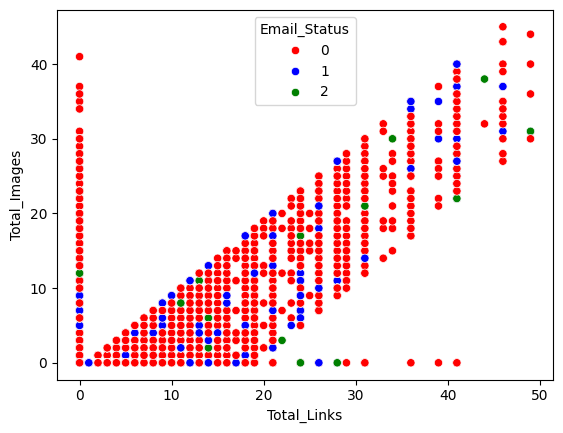

In [ ]:
# Chart - 12 visualization code
sns.scatterplot(data=df,x='Total_Links',y='Total_Images',hue='Email_Status',palette=['r','b','g'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

* Scatterplots reveal relationships between two variables, showing patterns such as correlations or clusters, aiding in understanding associations and identifying trends in data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

* Most of the emails have less links and images and it is effective because most of the email which is acknowledged by the reader have less images and links.
but some emails where number of links and images are high acknowledged by the reader

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

* Insights suggest that emails with fewer links and images are generally more effective, potentially leading to positive business impact by prioritizing content clarity and reducing distractions. However, the observation of some emails with high numbers of links and images being acknowledged by readers highlights the importance of balancing content richness with relevance to avoid overwhelming recipients and potentially leading to negative growth if not carefully managed.

#### Chart - 13 - Correlation Heatmap

<Axes: >

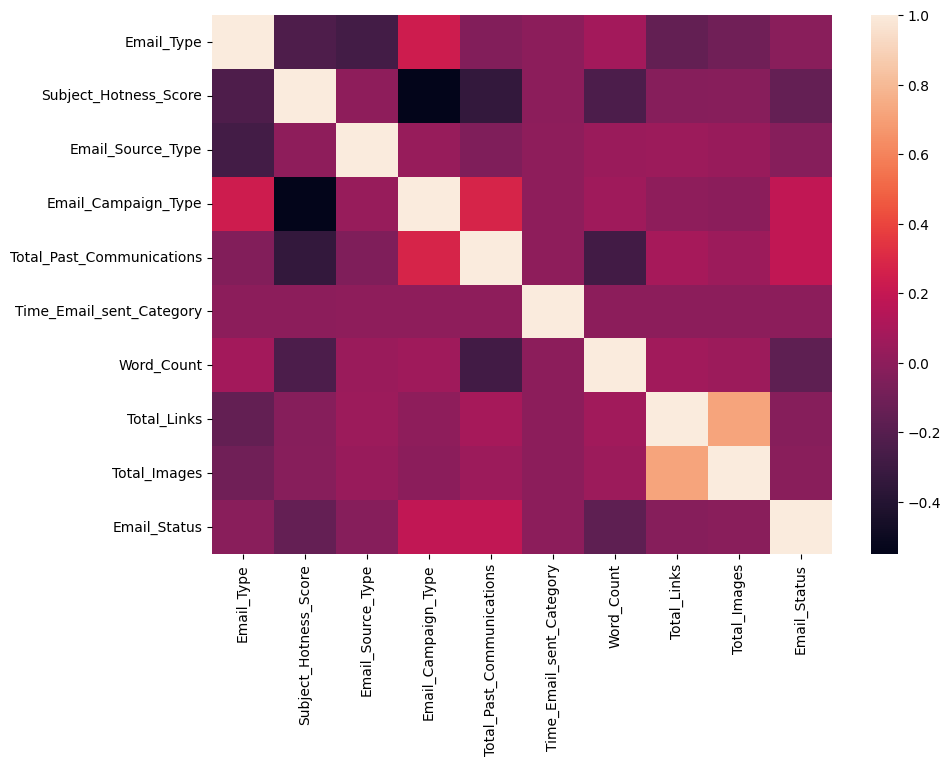

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,7))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr())

##### 1. Why did you pick the specific chart?

Answer Here.

* Correlation heatmaps provide a visual representation of the correlation matrix, making it easy to identify relationships between multiple variables and pinpointing areas of interest for further analysis.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

* From this chart We got to know Total Images with Total links have very high corelation
* Email Campaign Type with Subject Hotness Score have less corelation

#### Chart - 14 - Pair Plot

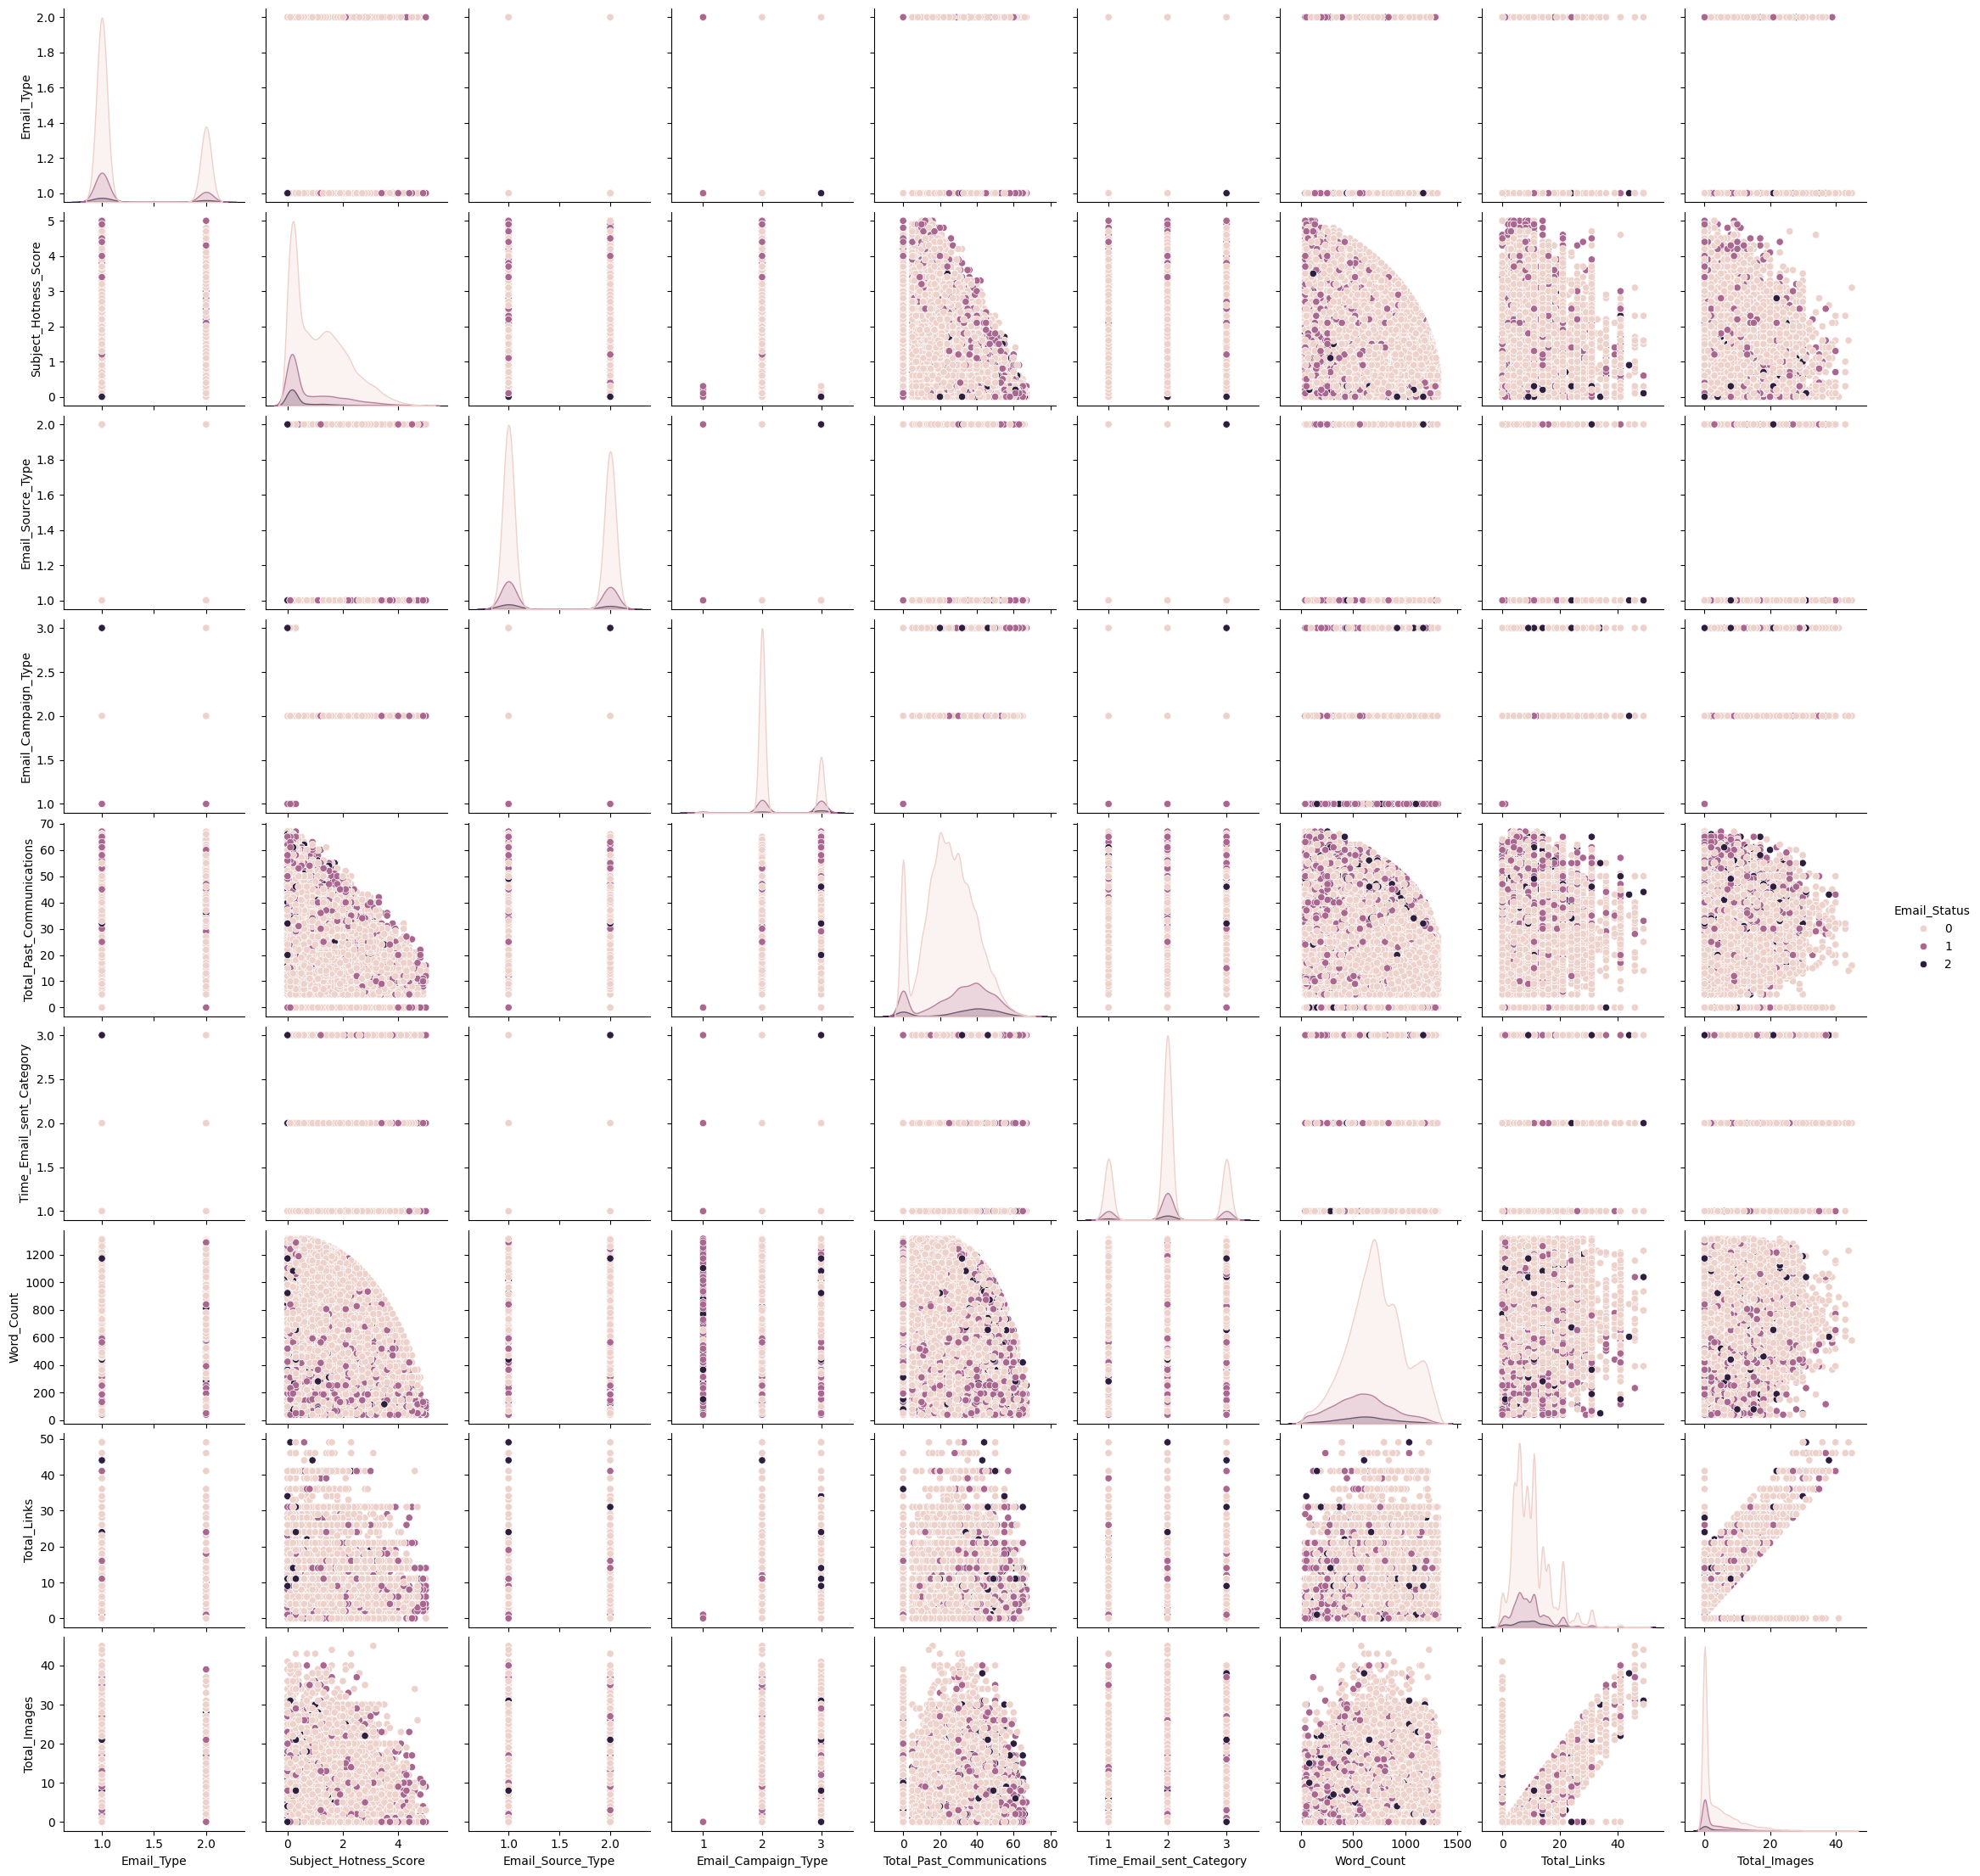

In [ ]:
# Pair Plot visualization code
sns.pairplot(df,hue='Email_Status')

##### 1. Why did you pick the specific chart?

Answer Here.


* Pair plots offer a comprehensive view of pairwise relationships in a dataset, aiding in identifying correlations, trends, and potential patterns among multiple variables in a single visualization.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

* From this chart we got to know many things like most of the read emails where 'Total_Past_Communications' is high but 'Word_Count' is low
* acknowledged by the reader is high when 'Subject_Hotness_Score' is low but 'Total_Links' any number

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

In [ ]:
# percentage of missing values in each columns
missing_values=(df.isnull().sum()/df.shape[0]*100).reset_index()
missing_values.columns =['Feature Name', 'percentage of missing values']
missing_values

,Feature Name,percentage of missing values
0,Email_ID,0.000000
1,Email_Type,0.000000
2,Subject_Hotness_Score,0.000000
3,Email_Source_Type,0.000000
4,Customer_Location,16.963411
5,Email_Campaign_Type,0.000000
6,Total_Past_Communications,0.000000
7,Time_Email_sent_Category,0.000000
8,Word_Count,0.000000
9,Total_Links,0.000000


<Axes: xlabel='Customer_Location', ylabel='count'>

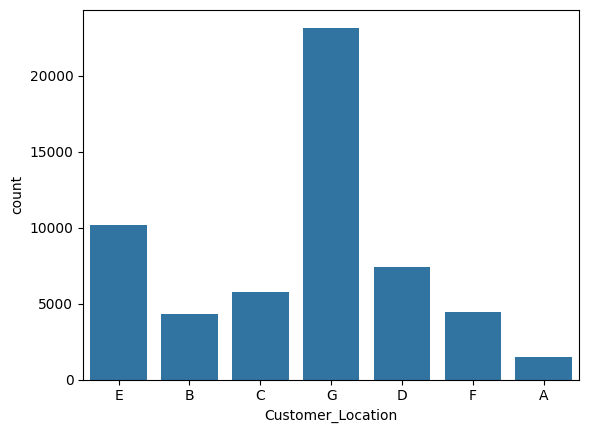

In [ ]:
# checking count of values for each values in Customer_Location	column
sns.countplot(data=df,x='Customer_Location')

In [ ]:
# checking mode value for Customer_Location	column
df['Customer_Location'].mode()

,Customer_Location
0,G


In [ ]:
# Using SimpleImputer we impute null values with most_frequent value
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
# convert to dataframe
new_df=pd.DataFrame(imp_mean.fit_transform(df))
new_df.columns=df.columns
new_df

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33,1,440,8,0,0
1,EMA00081000045360,2,2.1,1,G,2,15,2,504,5,0,0
2,EMA00081000066290,2,0.1,1,B,3,36,2,962,5,0,1
3,EMA00081000076560,1,3.0,2,E,2,25,2,610,16,0,0
4,EMA00081000109720,1,0.0,2,C,3,18,2,947,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68348,EMA00089995974500,2,0.4,1,F,2,22,3,737,16,13,0
68349,EMA00089998225300,1,1.3,1,C,2,40,2,653,31,16,0
68350,EMA00089998436500,1,2.2,2,G,2,33,2,490,9,0,0
68351,EMA00089999168800,1,0.4,1,E,2,50,1,733,14,4,0


In [ ]:
# Again chack percentage for null values for every columns
missing_values=(new_df.isnull().sum()/df.shape[0]*100).reset_index()
missing_values.columns =['Feature Name', 'percentage of missing values']
missing_values

,Feature Name,percentage of missing values
0,Email_ID,0.0
1,Email_Type,0.0
2,Subject_Hotness_Score,0.0
3,Email_Source_Type,0.0
4,Customer_Location,0.0
5,Email_Campaign_Type,0.0
6,Total_Past_Communications,0.0
7,Time_Email_sent_Category,0.0
8,Word_Count,0.0
9,Total_Links,0.0


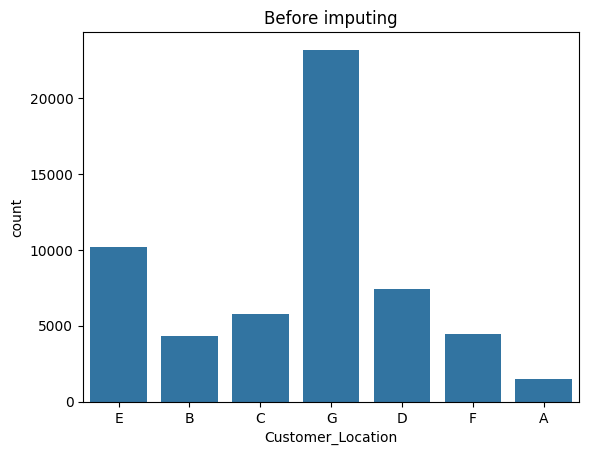

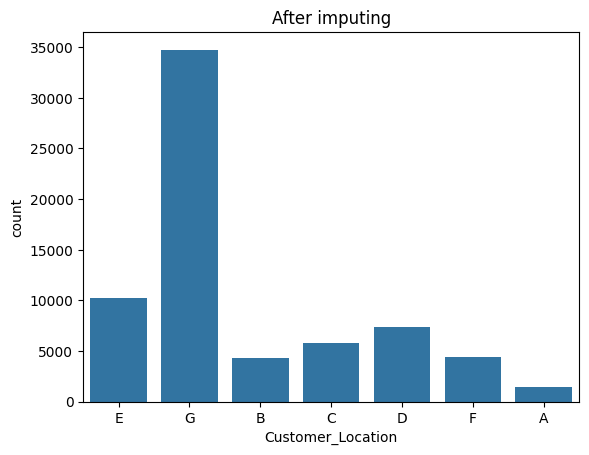

In [ ]:
# Before imputing and After imputing null values using plot
sns.countplot(data=df,x='Customer_Location')
plt.title('Before imputing')
plt.show()
sns.countplot(data=new_df,x='Customer_Location')
plt.title('After imputing')
plt.show()

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.
* Only one column had null values that is Customer_Location.
We impute those null values with most frequent value of the column using SimpleImputer

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

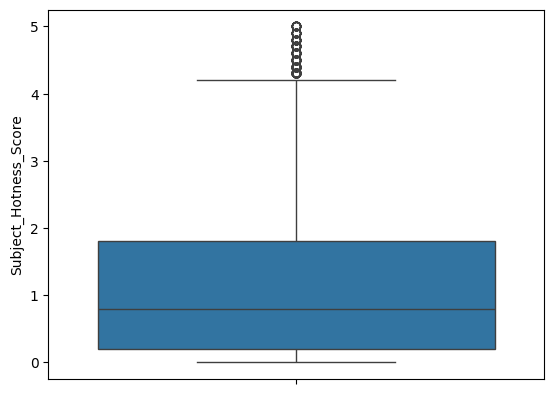

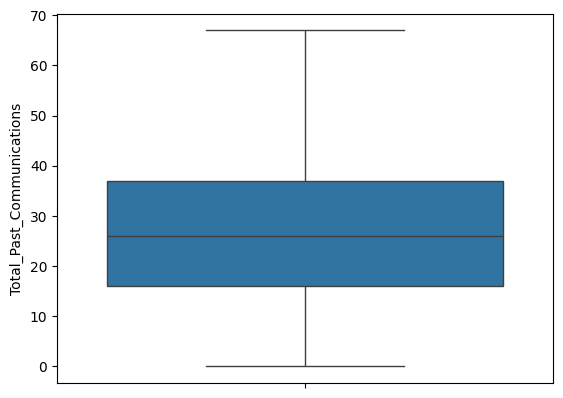

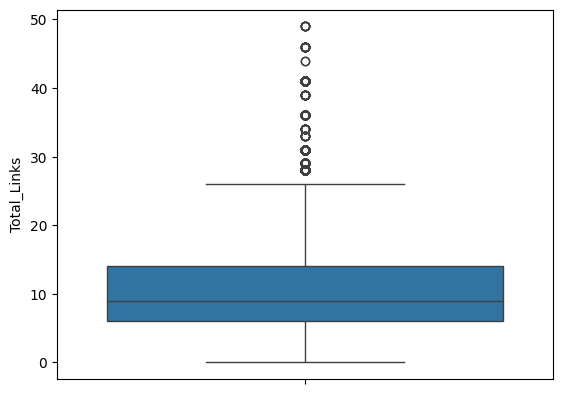

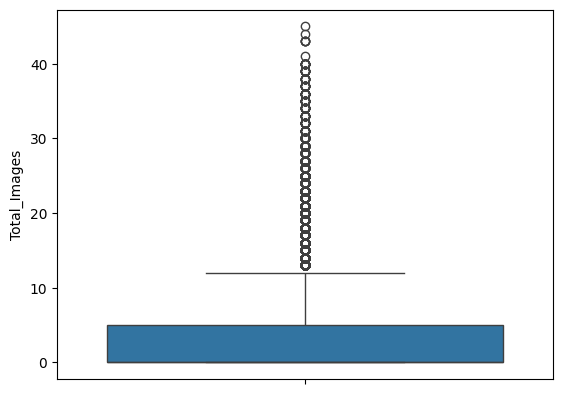

In [ ]:
# visualize outliers
for col in ['Subject_Hotness_Score','Total_Past_Communications', 'Total_Links','Total_Images']:
  sns.boxplot(new_df[col])
  plt.show()

In [ ]:
# copy data new variable
new_df_cap = new_df.copy()

In [ ]:
# remove outliers by the help of capping method
for col in ['Subject_Hotness_Score', 'Total_Links','Total_Images']:
  percentile25 = df[col].quantile(0.25)
  percentile75 = df[col].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr

  new_df_cap[col] = np.where(
    new_df_cap[col] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap[col] < lower_limit,
        lower_limit,
        new_df_cap[col]
    )
  )

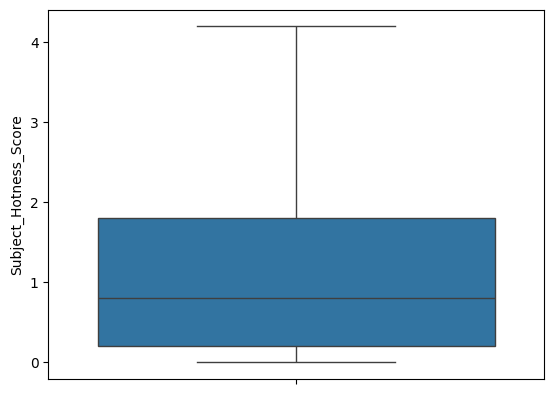

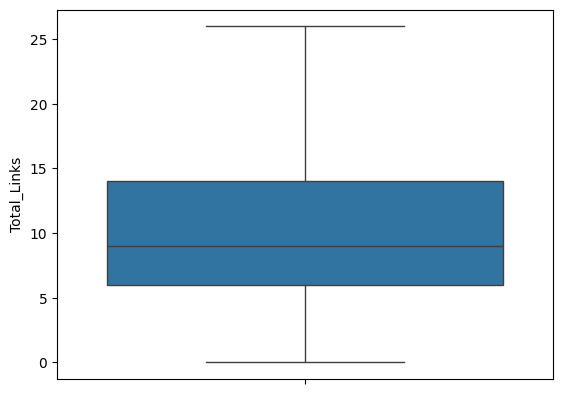

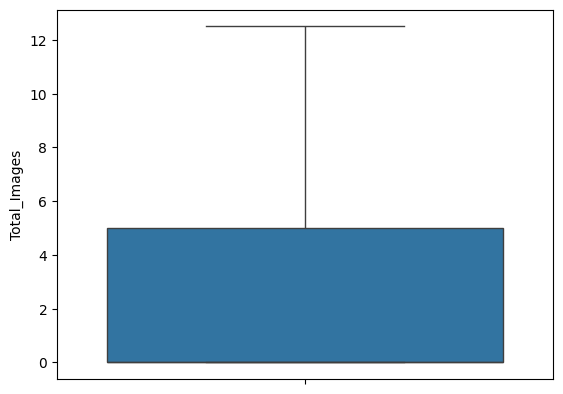

In [ ]:
# visualize outliers after removeing outliers
for col in ['Subject_Hotness_Score', 'Total_Links','Total_Images']:
  sns.boxplot(new_df_cap[col])
  plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.
* We had found outlier for Subject_Hotness_Score,Total_Past_Communications, Total_Links,Total_Images. After that we removed them using caping method.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

In [ ]:
# check unique value counts for every columns
new_df_cap.apply(lambda x : len(x.unique()))

,0
Email_ID,68353
Email_Type,2
Subject_Hotness_Score,43
Email_Source_Type,2
Customer_Location,7
Email_Campaign_Type,3
Total_Past_Communications,64
Time_Email_sent_Category,3
Word_Count,151
Total_Links,27


#### 2. Feature Selection

In [ ]:
# drop Email_ID column
new_df_cap_fs=new_df_cap.drop('Email_ID',axis=1)

##### What all feature selection methods have you used  and why?

Answer Here.
* We just found that our Email_ID column is not important. Because email id is unique for everybody. It is not import feature. It doesn't effect out column.

##### Which all features you found important and why?

Answer Here.

* From our above visualization we saw that every features are effects on our output column. Only Email_Id is not impotant feature So we remove it.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

In [ ]:
# change categorical columns into numericals
tf=ColumnTransformer(
    [
        ('tf1',OneHotEncoder(sparse=False,drop='first',dtype=np.int32),['Customer_Location'])
    ]
,remainder='passthrough')

In [ ]:
new_df_cap_fs_en=tf.fit_transform(new_df_cap_fs)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
new_df_cap_fs['Customer_Location'].unique()

array(['E', 'G', 'B', 'C', 'D', 'F', 'A'], dtype=object)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

* We used Onehotencoder for encode our Customer_Location feature. We used this because its split data into number of values columns and drop first. Which we had to needed here. At last our all features are numrical.


### 6. Data Scaling

In [ ]:
# Scaling your data

In [ ]:
pd.DataFrame(new_df_cap_fs_en).apply(lambda x: x.unique())

,0
0,"[0, 1]"
1,"[0, 1]"
2,"[0, 1]"
3,"[1, 0]"
4,"[0, 1]"
5,"[0, 1]"
6,"[1, 2]"
7,"[2.2, 2.1, 0.1, 3.0, 0.0, 1.5, 3.2, 0.7, 2.0, ..."
8,"[2, 1]"
9,"[2, 3, 1]"


In [ ]:
new_df_cap_fs_en_todf=pd.DataFrame(new_df_cap_fs_en)

In [ ]:
new_df_cap_fs_en_todf.columns=[str(i) for i in range(16)]

In [ ]:
new_df_cap_fs_en_todf.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,1,0,0,1,2.2,2,2,33,1,440,8,0,0
1,0,0,0,0,0,1,2,2.1,1,2,15,2,504,5,0,0


In [ ]:
new_df_cap_fs_en_todf.apply(lambda x: x.unique())

,0
0,"[0, 1]"
1,"[0, 1]"
2,"[0, 1]"
3,"[1, 0]"
4,"[0, 1]"
5,"[0, 1]"
6,"[1, 2]"
7,"[2.2, 2.1, 0.1, 3.0, 0.0, 1.5, 3.2, 0.7, 2.0, ..."
8,"[2, 1]"
9,"[2, 3, 1]"


In [ ]:
tf=ColumnTransformer(
    [
        ('tf2',StandardScaler(),['7','10','12','13','14'])
    ]
,remainder='passthrough')

In [ ]:
new_df_cap_fs_en_todf_scal=tf.fit_transform(pd.DataFrame(new_df_cap_fs_en_todf))

In [ ]:
Final_df=pd.DataFrame(new_df_cap_fs_en_todf_scal)

In [ ]:
Final_df=Final_df.astype(float)

In [ ]:
Final_df.dtypes

,0
0,float64
1,float64
2,float64
3,float64
4,float64
5,float64
6,float64
7,float64
8,float64
9,float64


##### Which method have you used to scale you data and why?

Answer Here.
* We use StandardScaler for scal out data on 5 columns only and we our final dataset.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

In [ ]:
X=Final_df.iloc[:,:-1]
y=Final_df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('X_train Size:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train Size:',y_train.shape)
print('y_test Size:',y_test.shape)

X_train Size: (54682, 15)
X_test: (13671, 15)
y_train Size: (54682,)
y_test Size: (13671,)


##### What data splitting ratio have you used and why?

Answer Here.
* First of all split our data into 2 parts first past has only input columns and second past has only output column. We stored it in X,y variable.

* Then We split this two parts into test and train set ratio 80:20. We choose 80% data for training and 20% testing because by the help of 80% data out model will be quit robust.

### 9. Handling Imbalanced Dataset

In [ ]:
y_train.value_counts()

,count
15,
0.0,43959
1.0,8807
2.0,1916


<Axes: xlabel='15', ylabel='count'>

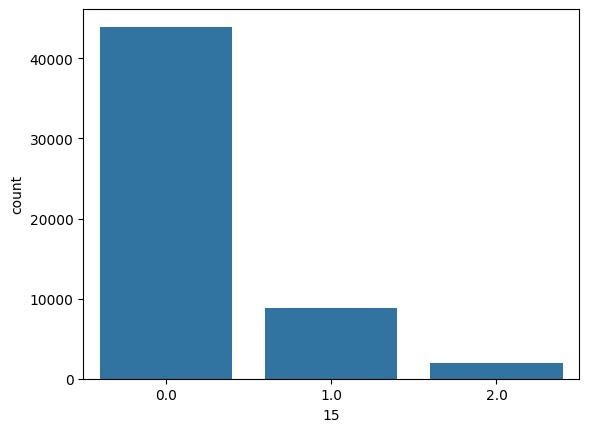

In [ ]:
# unbalanced data visualization
sns.barplot(y_train.value_counts())

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

* Yes our data set is imbalanced. Because in y_train 43959 values are 0 which means ignored emails, 8807 values are 1 which means read emails and 1916 values are 0 which means acknowledged emails.

In [ ]:
# Handling Imbalanced Dataset (If needed)

In [ ]:
# balanced data
st=SMOTE()
X_train_smote, y_train_smote = st.fit_resample(X_train,y_train)
y_train_smote.value_counts()

,count
15,
0.0,43959
1.0,43959
2.0,43959


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.
* We used Oversampling technique for balance our dataset. Because it balances the distribution of classes by increasing the number of samples in the minority class.

## ***6. ML Model Implementation***

In [ ]:
# create functions for metrics
def print_metrics(y_te,y_pr):
  print('Accuracy score:',accuracy_score(y_te,y_pr))
  print('Precision score:',precision_score(y_te,y_pr,average='weighted'))
  print('Recall score:',recall_score(y_te,y_pr,average='weighted'))
  print('F1 score:',f1_score(y_te,y_pr,average='weighted'))
  print('Confusion matrix:\n',confusion_matrix(y_te,y_pr))
  print('Classification report:\n',classification_report(y_te,y_pr,target_names=['acknowledged', 'read', 'ignored']))

def plot_confusion_matrix(y_te,y_pr):
  sns.heatmap(confusion_matrix(y_te,y_pr),annot=True, fmt=".0f")
  plt.title('Confusion Matrix')
  plt.show()

### ML Model - 1


---


# **LogisticRegression**

In [ ]:
# ML Model - 1 Implementation
LR=LogisticRegression()
# Fit the Algorithm
LR.fit(X_train_smote, y_train_smote)
y_pred_LR=LR.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Predict on the model
print_metrics(y_test,y_pred_LR)

Accuracy score: 0.543778801843318
Precision score: 0.7660836651914555
Recall score: 0.5437788018433181
F1 score: 0.6239351771758792
Confusion matrix:
 [[6635 1345 3002]
 [ 654  505 1073]
 [ 108   55  294]]
Classification report:
               precision    recall  f1-score   support

acknowledged       0.90      0.60      0.72     10982
        read       0.27      0.23      0.24      2232
     ignored       0.07      0.64      0.12       457

    accuracy                           0.54     13671
   macro avg       0.41      0.49      0.36     13671
weighted avg       0.77      0.54      0.62     13671



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

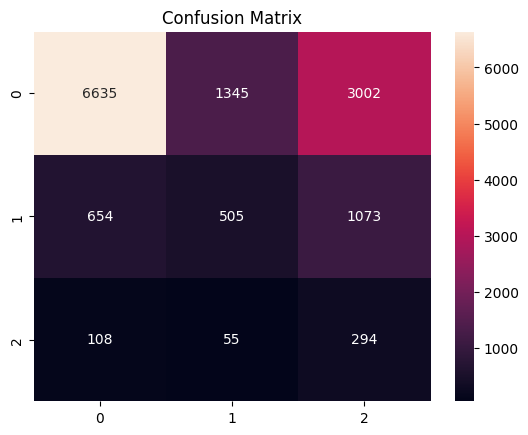

In [ ]:
# Visualizing evaluation Metric Score chart
plot_confusion_matrix(y_test,y_pred_LR)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

param_for_LR={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

LR_for_GC=LogisticRegression()
gc_LR=GridSearchCV(LR_for_GC,param_for_LR,n_jobs=-1,verbose=2,cv=5)

# Fit the Algorithm
gc_LR.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=2)

In [ ]:
gc_LR.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [ ]:
# Predict on the model
y_pred_for_gc_LR=gc_LR.predict(X_test)
print_metrics(y_test,y_pred_for_gc_LR)

Accuracy score: 0.5429010313802941
Precision score: 0.764427459387116
Recall score: 0.5429010313802941
F1 score: 0.6228766561748728
Confusion matrix:
 [[6654 1307 3021]
 [ 661  473 1098]
 [ 108   54  295]]
Classification report:
               precision    recall  f1-score   support

acknowledged       0.90      0.61      0.72     10982
        read       0.26      0.21      0.23      2232
     ignored       0.07      0.65      0.12       457

    accuracy                           0.54     13671
   macro avg       0.41      0.49      0.36     13671
weighted avg       0.76      0.54      0.62     13671



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

* We have used GridSearchCV optimization technique because GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

* After using hyperparameter tuning and cross validation we got out model accuracy little increase.

### ML Model - 2


---


# **DecisionTreeClassifier**

In [ ]:
# ML Model - 2 Implementation
DT=DecisionTreeClassifier()
# Fit the Algorithm
DT.fit(X_train_smote, y_train_smote)
y_pred_DT=DT.predict(X_test)

In [ ]:
# Predict on the model
print_metrics(y_test,y_pred_DT)

Accuracy score: 0.6923414527101163
Precision score: 0.728614942424508
Recall score: 0.6923414527101163
F1 score: 0.7090542591977109
Confusion matrix:
 [[8704 1804  474]
 [1304  701  227]
 [ 226  171   60]]
Classification report:
               precision    recall  f1-score   support

acknowledged       0.85      0.79      0.82     10982
        read       0.26      0.31      0.29      2232
     ignored       0.08      0.13      0.10       457

    accuracy                           0.69     13671
   macro avg       0.40      0.41      0.40     13671
weighted avg       0.73      0.69      0.71     13671



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

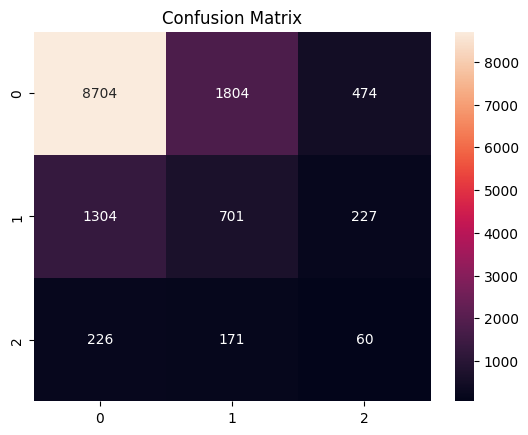

In [ ]:
# Visualizing evaluation Metric Score chart
plot_confusion_matrix(y_test,y_pred_DT)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

param_for_DT = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

DT_for_gc=DecisionTreeClassifier()
gc_DT=GridSearchCV(DT_for_gc,param_for_DT,n_jobs=-1,verbose=2,cv=5)

# Fit the Algorithm
gc_DT.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             verbose=2)

In [ ]:
gc_DT.best_params_

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}

In [ ]:
# Predict on the model
y_pred_for_gc_DT=gc_DT.predict(X_test)
print_metrics(y_test,y_pred_for_gc_DT)

Accuracy score: 0.7092385341233267
Precision score: 0.7412013082064756
Recall score: 0.7092385341233267
F1 score: 0.7239227145113848
Confusion matrix:
 [[8859 1730  393]
 [1230  760  242]
 [ 211  169   77]]
Classification report:
               precision    recall  f1-score   support

acknowledged       0.86      0.81      0.83     10982
        read       0.29      0.34      0.31      2232
     ignored       0.11      0.17      0.13       457

    accuracy                           0.71     13671
   macro avg       0.42      0.44      0.43     13671
weighted avg       0.74      0.71      0.72     13671



##### Which hyperparameter optimization technique have you used and why?

Answer Here.
* We have used GridSearchCV optimization technique because GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.
* We used hyperparameter tuning on Dicision Tree we got our model accuracy little increase.

### ML Model - 3


---


# **XGBClassifier**

In [ ]:
# ML Model - 3 Implementation
XGB=XGBClassifier()
# Fit the Algorithm
XGB.fit(X_train_smote, y_train_smote)
y_pred_XGB=XGB.predict(X_test)

In [ ]:
# Predict on the model
print_metrics(y_test,y_pred_XGB)

Accuracy score: 0.7992100065832785
Precision score: 0.7573650199600515
Recall score: 0.7992100065832785
F1 score: 0.7679757450404096
Confusion matrix:
 [[10419   430   133]
 [ 1649   443   140]
 [  272   121    64]]
Classification report:
               precision    recall  f1-score   support

acknowledged       0.84      0.95      0.89     10982
        read       0.45      0.20      0.27      2232
     ignored       0.19      0.14      0.16       457

    accuracy                           0.80     13671
   macro avg       0.49      0.43      0.44     13671
weighted avg       0.76      0.80      0.77     13671



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

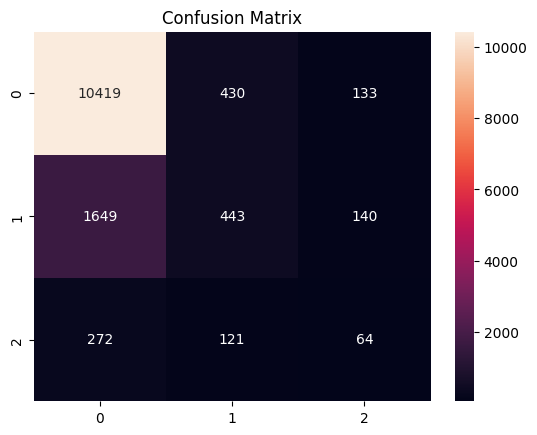

In [ ]:
# Visualizing evaluation Metric Score chart
plot_confusion_matrix(y_test,y_pred_XGB)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

param_for_XGB={
        'min_child_weight': [0,1, 5],
        'gamma': [0.5, 1],
        'subsample': [0.5,0.6, 0.8],
        'colsample_bytree': [0.8,0.9],
        'max_depth': [5,6]
        }

XGB_for_gc=XGBClassifier()
gc_XGB=GridSearchCV(XGB_for_gc,param_for_XGB,n_jobs=-1,verbose=2,cv=5)
# Fit the Algorithm
gc_XGB.fit(X_train_smote, y_train_smote)

NameError: name 'XGBClassifier' is not defined

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from xgboost import XGBClassifier # Import the XGBClassifier class

param_for_XGB={
        'min_child_weight': [0,1, 5],
        'gamma': [0.5, 1],
        'subsample': [0.5,0.6, 0.8],
        'colsample_bytree': [0.8,0.9],
        'max_depth': [5,6]
        }

XGB_for_gc=XGBClassifier()
gc_XGB=GridSearchCV(XGB_for_gc,param_for_XGB,n_jobs=-1,verbose=2,cv=5)
# Fit the Algorithm
gc_XGB.fit(X_train_smote, y_train_smote)

NameError: name 'GridSearchCV' is not defined

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from xgboost import XGBClassifier # Import the XGBClassifier class
from sklearn.model_selection import GridSearchCV # Import GridSearchCV

# ... (Code to generate X_train_smote and y_train_smote should go here) ...
# Example:
# from sklearn.datasets import make_classification
# X, y = make_classification()
# # ... (Code to apply SMOTE and split into training data) ...

param_for_XGB={
        'min_child_weight': [0,1, 5],
        'gamma': [0.5, 1],
        'subsample': [0.5,0.6, 0.8],
        'colsample_bytree': [0.8,0.9],
        'max_depth': [5,6]
        }

XGB_for_gc=XGBClassifier()
gc_XGB=GridSearchCV(XGB_for_gc,param_for_XGB,n_jobs=-1,verbose=2,cv=5)

# Fit the Algorithm
gc_XGB.fit(X_train_smote, y_train_smote)

NameError: name 'X_train_smote' is not defined

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from xgboost import XGBClassifier # Import the XGBClassifier class
from sklearn.model_selection import GridSearchCV # Import GridSearchCV
from sklearn.datasets import make_classification # Import function to create example dataset
from sklearn.model_selection import train_test_split # Import function to split dataset

# Generate example dataset for demonstration
X, y = make_classification(random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Placeholder for SMOTE application (replace with actual SMOTE code)
X_train_smote = X_train
y_train_smote = y_train

param_for_XGB={
        'min_child_weight': [0,1, 5],
        'gamma': [0.5, 1],
        'subsample': [0.5,0.6, 0.8],
        'colsample_bytree': [0.8,0.9],
        'max_depth': [5,6]
        }

XGB_for_gc=XGBClassifier()
gc_XGB=GridSearchCV(XGB_for_gc,param_for_XGB,n_jobs=-1,verbose=2,cv=5)

# Fit the Algorithm
gc_XGB.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9], 'gamma': [0.5, 1],
                         'max_depth': [5, 6], 'min_child_weight': [0, 1, 5],
                         'subsample': [0.5, 0.6, 0.8]},
             verbose=2)

In [ ]:
# Predict on the model
y_pred_for_gc_XGB=gc_XGB.predict(X_test)
print_metrics(y_test,y_pred_for_gc_XGB)

NameError: name 'print_metrics' is not defined

In [ ]:
# Predict on the model
y_pred_for_gc_XGB=gc_XGB.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print evaluation metrics
print(confusion_matrix(y_test,y_pred_for_gc_XGB))
print(classification_report(y_test,y_pred_for_gc_XGB))
print(accuracy_score(y_test, y_pred_for_gc_XGB))

[[11  2]
 [ 0  7]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.78      1.00      0.88         7

    accuracy                           0.90        20
   macro avg       0.89      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20

0.9


In [ ]:
gc_XGB.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.5,
 'max_depth': 5,
 'min_child_weight': 0,
 'subsample': 0.6}

##### Which hyperparameter optimization technique have you used and why?

Answer Here.
* We have used GridSearchCV optimization technique because GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.
* Before using GridSearchCV and After using GridSearchCV in both way we got same accuracy.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

* For this business problem we choose accauracy and precision. Acurracy measures how often a machine learning model correctly predicts the outcome and precision for Turely predition out of total True predition.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

* After Evaluation accuracy we have to choose model 3 which is XGBoost with Hyper parameter Optimaze. because here accuracy is highest.

* We got lowest accuracy in model-1. We used logistic regression for that model.Thats why model-1 very bad.

* In model-3(Dicision Tree) accuracy is better than out model-1.

* For model-3 Accuracy is around 80%

  and Precision is around 75%

# **Conclusion**

Write the conclusion here.


*   In EDA, we observed that Email_Campaign_Type was the most important feature. If your Email_Campaign_Type was 1, there is a 90% likelihood of your Email to be read/acknowledged.

*   80.4% emails are ignored by the reader,16.1% emails read by the reader and only 3.5% emails are acknowledged by the reader

*   distribution of Total Past Communications.Where Total Past Communications is 20-50 where ignored by the reader is very high and some where Total Past Communications 40 there acknowledged by the reader is high.

*  Type 1 email is mostly ignore by the reader

*   Customer Location "G" has most ignored emails and Customer Location "A" has very less acknowledged email only 49.

*   Email Campaign Type 1 is no effective.Email Campaign Type 2 Failed because there are so many ignored emails are there and Email Campaign Type 3 is most effective because here ignored, read and acknowledged ratio is 12749, 5107 and 1488.

*   most of the emails send in  evening time and here ration of ignored emails are high on the other hand morning and nigh time emails are more effective

*   Total Images with Total links have very high corelation and Email Campaign Type with Subject Hotness Score have less corelation



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***